In [1]:
import scanpy as sc
data_dir = '../../dataset/Marshall2022High_human_sampled.h5ad'
adata = sc.read_h5ad(data_dir)
adata.X = adata.raw.X
adata

AnnData object with n_obs × n_vars = 179623 × 20299
    obs: 'mapped_reference_annotation', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'tissue_type', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'reported_diseases', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'batch'
    var: 'feature_reference', 'feature_biotype', 'feature_is_filtered-0', 'feature_name-0', 'feature_length-0', 'feature_type-0', 'feature_is_filtered-1', 'feature_name-1', 'feature_length-1', '

In [2]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [3]:

# 更新 adata.var.index 为基因名
adata.var['gene_id'] = adata.var.index
adata.var.index = adata.var['gene_name']

# 输出 adata.var
adata.var

,feature_reference,feature_biotype,feature_is_filtered-0,feature_name-0,feature_length-0,feature_type-0,feature_is_filtered-1,feature_name-1,feature_length-1,feature_type-1,...,feature_is_filtered-6,feature_name-6,feature_length-6,feature_type-6,feature_is_filtered-7,feature_name-7,feature_length-7,feature_type-7,gene_name,gene_id
gene_name,,,,,,,,,,,,,,,,,,,,,
A1BG,NCBITaxon:9606,gene,True,A1BG,2134,protein_coding,False,A1BG,2134,protein_coding,...,True,A1BG,2134,protein_coding,True,A1BG,2134,protein_coding,A1BG,ENSG00000121410
A1BG-AS1,NCBITaxon:9606,gene,False,A1BG-AS1,1667,lncRNA,False,A1BG-AS1,1667,lncRNA,...,False,A1BG-AS1,1667,lncRNA,False,A1BG-AS1,1667,lncRNA,A1BG-AS1,ENSG00000268895
A1CF,NCBITaxon:9606,gene,False,A1CF,2211,protein_coding,False,A1CF,2211,protein_coding,...,False,A1CF,2211,protein_coding,False,A1CF,2211,protein_coding,A1CF,ENSG00000148584
A2M,NCBITaxon:9606,gene,False,A2M,590,protein_coding,False,A2M,590,protein_coding,...,False,A2M,590,protein_coding,False,A2M,590,protein_coding,A2M,ENSG00000175899
A2M-AS1,NCBITaxon:9606,gene,False,A2M-AS1,2551,lncRNA,False,A2M-AS1,2551,lncRNA,...,False,A2M-AS1,2551,lncRNA,False,A2M-AS1,2551,lncRNA,A2M-AS1,ENSG00000245105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,NCBITaxon:9606,gene,False,ZZZ3,686,protein_coding,False,ZZZ3,686,protein_coding,...,False,ZZZ3,686,protein_coding,False,ZZZ3,686,protein_coding,ZZZ3,ENSG00000036549
MISP3,NCBITaxon:9606,gene,False,MISP3,1473,protein_coding,False,MISP3,1473,protein_coding,...,False,MISP3,1473,protein_coding,False,MISP3,1473,protein_coding,MISP3,ENSG00000141854
ENSG00000234352.9,NCBITaxon:9606,gene,False,ENSG00000234352.9,728,lncRNA,False,ENSG00000234352.9,728,lncRNA,...,False,ENSG00000234352.9,728,lncRNA,False,ENSG00000234352.9,728,lncRNA,ENSG00000234352.9,ENSG00000234352


In [4]:
%load_ext autoreload
%autoreload 2
import scanpy as sc
import torch
from torch import nn
import lightning.pytorch as pl
from self_supervision.models.lightning_modules.cellnet_autoencoder import MLPBarlowTwins
from self_supervision.estimator.cellnet import EstimatorAutoEncoder

# 设置你的 .ckpt 文件路径
ckpt_path = "../../sc_pretrained/Pretrained Models/BarlowTwins.ckpt"

# 模型参数
units_encoder = [512, 512, 256, 256, 64]

# 初始化 EstimatorAutoEncoder 实例
estim = EstimatorAutoEncoder(data_path=None)  # 如果没有实际数据路径，可以设置为None

# 加载预训练模型
estim.model = MLPBarlowTwins(
        gene_dim=19331,  # 根据你的数据调整
        batch_size=128,  # 根据你的需要调整
        units_encoder=units_encoder,
        CHECKPOINT_PATH=ckpt_path
    )


estim.trainer = pl.Trainer(accelerator="gpu", devices=1 if torch.cuda.is_available() else None)

/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/merlin/dtypes/mappings/tf.py:52: UserWarning: Tensorflow dtype mappings did not load successfully due to an error: No module named 'tensorflow'
  warn(f"Tensorflow dtype mappings did not load successfully due to an error: {exc.msg}")
/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs


In [5]:
# 加载 checkpoint
checkpoint = torch.load(ckpt_path)
estim.model.inner_model.load_state_dict({k.replace('backbone.', ''): v for k, v in checkpoint.items() if 'backbone' in k})


<All keys matched successfully>

In [6]:
# 添加分类层 (FC)
n_classes = len(adata.obs['cell_type'].unique())
estim.model.fc = nn.Linear(units_encoder[-1], n_classes)
n_classes

14

In [7]:
import pandas as pd
var_df = pd.read_parquet('../../sc_pretrained/var.parquet')
var_df

,feature_id,feature_name
0,ENSG00000186092,OR4F5
1,ENSG00000284733,OR4F29
2,ENSG00000284662,OR4F16
3,ENSG00000187634,SAMD11
4,ENSG00000188976,NOC2L
...,...,...
19326,ENSG00000288702,UGT1A3
19327,ENSG00000288705,UGT1A5
19328,ENSG00000182484,WASH6P
19329,ENSG00000288622,PDCD6-AHRR


In [8]:
all_genes = var_df['feature_name'].tolist()

In [9]:
adata.var['gene_name']=adata.var.index

In [10]:
existing_genes = adata.var['gene_name']

In [11]:
# 将所有基因名称转换为小写
all_genes_lower = [gene.lower() for gene in all_genes]
adata_genes_lower = [gene.lower() for gene in existing_genes]

# 将两个列表转换为集合
all_genes_set = set(all_genes_lower)
adata_genes_set = set(adata_genes_lower)

# 计算交集
matching_genes = all_genes_set.intersection(adata_genes_set)
matching_count = len(matching_genes)
# 计算不匹配的基因
non_matching_genes = adata_genes_set - matching_genes
non_matching_count = len(non_matching_genes)


# 输出结果
print(f"匹配的基因数量: {matching_count}")
print(f"匹配的基因列表: {matching_genes}")

匹配的基因数量: 15360
匹配的基因列表: {'xpa', 'nxt2', 'lfng', 'c9orf43', 'ccl26', 'ttc1', 'dusp16', 'sall2', 'bcl2l2-pabpn1', 'abi3', 'rabgef1', 'pomgnt2', 'tmeff2', 'radil', 'psmg2', 'wdr45', 'uqcr10', 'adamts1', 'micos13', 'parpbp', 'lmbrd2', 'siva1', 'aff2', 'chchd1', 'lsm5', 'il2rb', 'atf2', 'prame', 'sltm', 'iqsec3', 'angptl8', 'tspoap1', 'pigbos1', 'msrb2', 'fgf12', 'lins1', 'unc45b', 'tex2', 'capn11', 'ppp6r3', 'tapt1', 'idh1', 'kyat1', 'znf226', 'plpbp', 'actr6', 'ing5', 'pdlim3', 'rtn2', 'crtam', 'mcm3', 'eif6', 'cd1d', 'tmem38b', 'trappc11', 'ric1', 'garre1', 'mylk4', 'usf3', 'samd14', 'mrpl50', 'pkn1', 'tmem98', 'puf60', 'spc25', 'fam184a', 'ddx43', 'usp42', 'wdr20', 'gimap6', 'alkbh2', 'crebrf', 'nrros', 'hspa14', 'usp37', 'nudt1', 'pycr3', 'kiaa2026', 'secisbp2', 'kif5b', 'pdpr', 'rnf213', 'ghrhr', 'slc38a10', 'oxer1', 'eif1b', 'sh3tc1', 'nsfl1c', 'deaf1', 'c16orf95', 'pin1', 'wfdc1', 'cldn14', 'fez2', 'cd4', 'btc', 'upb1', 'brcc3', 'lat2', 'lmbrd1', 'man1b1', 'fam111a', 'ldhc', 'cenpi'

In [12]:
gene_to_index = {gene: idx for idx, gene in enumerate(all_genes_lower)}
gene_to_index

{'or4f5': 0,
 'or4f29': 1,
 'or4f16': 2,
 'samd11': 3,
 'noc2l': 4,
 'klhl17': 5,
 'plekhn1': 6,
 'perm1': 7,
 'hes4': 8,
 'isg15': 9,
 'agrn': 10,
 'rnf223': 11,
 'c1orf159': 12,
 'ttll10': 13,
 'tnfrsf18': 14,
 'tnfrsf4': 15,
 'sdf4': 16,
 'b3galt6': 17,
 'c1qtnf12': 18,
 'ube2j2': 19,
 'scnn1d': 20,
 'acap3': 21,
 'pusl1': 22,
 'ints11': 23,
 'cptp': 24,
 'tas1r3': 25,
 'dvl1': 26,
 'mxra8': 27,
 'aurkaip1': 28,
 'ccnl2': 29,
 'mrpl20': 30,
 'ankrd65': 31,
 'tmem88b': 32,
 'vwa1': 33,
 'atad3c': 34,
 'atad3b': 35,
 'atad3a': 36,
 'tmem240': 37,
 'ssu72': 38,
 'fndc10': 39,
 'mib2': 40,
 'mmp23b': 41,
 'cdk11b': 42,
 'slc35e2b': 43,
 'cdk11a': 44,
 'nadk': 45,
 'gnb1': 46,
 'calml6': 47,
 'tmem52': 48,
 'cfap74': 49,
 'gabrd': 50,
 'prkcz': 51,
 'faap20': 52,
 'ski': 53,
 'morn1': 54,
 'rer1': 55,
 'pex10': 56,
 'plch2': 57,
 'pank4': 58,
 'hes5': 59,
 'tnfrsf14': 60,
 'prxl2b': 61,
 'mmel1': 62,
 'ttc34': 63,
 'actrt2': 64,
 'prdm16': 65,
 'arhgef16': 66,
 'megf6': 67,
 'tprg1l': 68

In [13]:
only_in_all_genes = all_genes_set - adata_genes_set

only_in_adata_genes = adata_genes_set - all_genes_set

# 输出结果
print(f"仅在 all_genes 中存在的基因数量: {len(only_in_all_genes)}")
print(f"仅在 all_genes 中存在的基因: {only_in_all_genes}")

print(f"仅在 adata_genes 中存在的基因数量: {len(only_in_adata_genes)}")
print(f"仅在 adata_genes 中存在的基因: {only_in_adata_genes}")


仅在 all_genes 中存在的基因数量: 3971
仅在 all_genes 中存在的基因: {'gpr142', 'gage12b', 'myh2', 'ifitm5', 'bpifb4', 'rtp3', 'cgb8', 'atp6v0c', 'tspy3', 'tpte', 'tp53tg3d', 'asah2', 'h2bw2', 'amelx', 'h3c6', 'lce1d', 'ct47a6', 'or2t6', 'ly6l', 'tcp11x2', 'ankrd18a', 'cela3a', 'h2ac21', 'golga8s', 'pnlip', 'aqp10', 'hnrnpcl3', 'spata31e1', 'spdye11', 'wdr61', 'setsip', 'gmcl2', 'smim18', 'stpg4', 'ppp4r3c', 'rpe65', 'cpb2', 'fam102b', 'pcdhga2', 'ascl1', 'cox8c', 'tubb3', 'barx1', 'mt1b', 'or2m3', 'mrgprx2', 'krtap26-1', 'dll3', 'cst5', 'cckbr', 'prss50', 'mrps17', 'or2k2', 'mpig6b', 'pde6h', 'kirrel2', 'tmprss11d', 'or4c16', 'gage12j', 'ten1', 'or2a14', 'ppp1r2b', 'ccnq', 'or8j1', 'zscan5b', 'zcchc3', 'gja8', 'lmod2', 'c10orf99', 'ccdc105', 'or13c2', 'smyd1', 'apobec4', 'atp1a4', 'tubb8', 'kir2dl3', 'mmp8', 'slc17a8', 'vgll2', 'f3', 'ugt2b15', 'fam102a', 'golga6l7', 'rgr', 'marcks', 'cyp2a13', 'col20a1', 'cfb', 'nkpd1', 'trim77', 'irgm', 'tmem249', 'mos', 'psg4', 'ankrd33', 'akap17a', 'taf11l14', 'agxt'

In [14]:
import numpy as np
from scipy.sparse import csr_matrix

# Initialize a mapping from gene names in adata to their column indices
adata_gene_to_index = {gene: idx for idx, gene in enumerate(adata_genes_lower)}

# Create an array to map adata.X column indices to new_data column indices
adata_to_new_data_indices = -1 * np.ones(adata.X.shape[1], dtype=int)
for idx, gene in enumerate(adata_genes_lower):
    if gene in gene_to_index:
        adata_to_new_data_indices[idx] = gene_to_index[gene]



# Extract data from adata.X without converting it to a dense array
data = adata.X.data
indices = adata.X.indices
indptr = adata.X.indptr

# Map the column indices to the new indices in new_data
mapped_indices = adata_to_new_data_indices[indices]

# Filter out entries where the mapping is invalid (-1)
valid_entries = mapped_indices != -1
new_data_values = data[valid_entries]
new_data_indices = mapped_indices[valid_entries]

# Build the new indptr array for the new_data matrix
new_indptr = np.zeros(adata.X.shape[0] + 1, dtype=int)


for i in range(adata.X.shape[0]):
    row_start = indptr[i]
    row_end = indptr[i + 1]
    valid_count = np.sum(valid_entries[row_start:row_end])
    new_indptr[i + 1] = new_indptr[i] + valid_count


# Construct the new_data sparse matrix
new_data = csr_matrix(
    (new_data_values, new_data_indices, new_indptr),
    shape=(adata.X.shape[0], len(all_genes)),
    dtype=np.float32
)
new_data = new_data.toarray()

In [15]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(adata.obs['cell_type'])  # 预先编码标签


random_seed = 42
X_train_val, X_test, y_train_val, y_test = train_test_split(
    new_data, labels_encoded, test_size=0.15, random_state=random_seed)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=random_seed)  # 0.1765 是为了让验证集占 15%

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



# 将训练数据转换为张量
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train).float().to(device)
y_train_tensor = torch.tensor(y_train).long().to(device)
X_val_tensor = torch.tensor(X_val).float().to(device)
y_val_tensor = torch.tensor(y_val).long().to(device)
estim.model.to(device)

cuda


MLPBarlowTwins(
  (train_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=train_
  )
  (val_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=val_
  )
  (test_metrics): MetricCollection(
    (explained_var_uniform): ExplainedVariance()
    (explained_var_weighted): ExplainedVariance()
    (mse): MeanSquaredError(),
    prefix=test_
  )
  (inner_model): MLP(
    (0): Linear(in_features=19331, out_features=512, bias=True)
    (1): SELU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): SELU()
    (5): Dropout(p=0.0, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): SELU()
    (8): Dropout(p=0.0, inplace=False)
    (9): Linear(in_features=256, out_features=25

In [16]:
for param in estim.model.inner_model.parameters():
    param.requires_grad = False  # 冻结所有层

# 解冻最后
for param in list(estim.model.inner_model.parameters())[-5:]:
    param.requires_grad = True

In [17]:
from torch.optim import AdamW
# 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(filter(lambda p: p.requires_grad, estim.model.parameters()), lr=9e-4, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

In [18]:
from torch.utils.data import DataLoader, TensorDataset

# 设置 batch size
batch_size = 128  # 根据实际需求调整 batch size

# 使用 TensorDataset 将训练数据和标签打包
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# 使用 DataLoader 来创建批次
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 7. 微调模型
def train_epoch(model, optimizer, loss_fn, train_loader, val_loader):
    model.train()
    total_train_loss = 0
    
    # 训练集批次训练
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        # 前向传播
        outputs = model.inner_model(X_batch)
        logits = model.fc(outputs)
        
        # 计算损失
        loss = loss_fn(logits, y_batch)
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item()
    
    # 验证集
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_outputs = model.inner_model(X_val_batch)
            val_logits = model.fc(val_outputs)
            val_loss = loss_fn(val_logits, y_val_batch)
            total_val_loss += val_loss.item()

    # 返回平均损失
    return total_train_loss / len(train_loader), total_val_loss / len(val_loader)

In [19]:
import copy  # 用于保存模型的最佳状态

# Early Stopping 参数
patience = 20  # 如果验证损失在 10 个 epoch 中没有改善，停止训练
min_delta = 1e-4  # 最小改善幅度
patience_counter = 0
best_val_loss = float('inf')  # 初始设置为正无穷大
best_model_weights = copy.deepcopy(estim.model.state_dict())  # 保存最佳模型权重
train_losses = []
val_losses = []

# 训练 500 个 epoch
for epoch in range(500):
    train_loss, val_loss = train_epoch(estim.model, optimizer, loss_fn, train_loader, val_loader)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Validation Loss: {val_loss}')
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Early Stopping 检查
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss  # 更新最佳验证损失
        patience_counter = 0  # 重置 patience 计数器
        best_model_weights = copy.deepcopy(estim.model.state_dict())  # 保存当前最佳模型
        print(f"Validation loss improved to {best_val_loss} at epoch {epoch+1}, resetting patience.")
    else:
        patience_counter += 1
        print(f"No improvement in validation loss. Patience counter: {patience_counter}/{patience}")
    
    # 如果 patience_counter 超过设置的 patience，停止训练
    if patience_counter >= patience:
        print(f"Early stopping triggered. Stopping training at epoch {epoch+1}.")
        break

# 恢复到训练中性能最好的模型权重
estim.model.load_state_dict(best_model_weights)
print("Loaded best model weights based on validation loss.")


Epoch 1, Train Loss: 1.1934079335034198, Validation Loss: 1.1191793120867832


Validation loss improved to 1.1191793120867832 at epoch 1, resetting patience.


Epoch 2, Train Loss: 1.102778999936423, Validation Loss: 1.1103583930227994
Validation loss improved to 1.1103583930227994 at epoch 2, resetting patience.


Epoch 3, Train Loss: 1.0822773141026618, Validation Loss: 1.0754527497630548
Validation loss improved to 1.0754527497630548 at epoch 3, resetting patience.


Epoch 4, Train Loss: 1.0703431759579136, Validation Loss: 1.075055895823438
Validation loss improved to 1.075055895823438 at epoch 4, resetting patience.


Epoch 5, Train Loss: 1.0651515784122936, Validation Loss: 1.0714561676527086
Validation loss improved to 1.0714561676527086 at epoch 5, resetting patience.


Epoch 6, Train Loss: 1.0561834990311252, Validation Loss: 1.0665119536115095
Validation loss improved to 1.0665119536115095 at epoch 6, resetting patience.


Epoch 7, Train Loss: 1.0514697905474495, Validation Loss: 1.0496138794727234
Validation loss improved to 1.0496138794727234 at epoch 7, resetting patience.


Epoch 8, Train Loss: 1.0497148047264813, Validation Loss: 1.0515297724737376
No improvement in validation loss. Patience counter: 1/20


Epoch 9, Train Loss: 1.0431133691194947, Validation Loss: 1.0463525223506005
Validation loss improved to 1.0463525223506005 at epoch 9, resetting patience.


Epoch 10, Train Loss: 1.0405548353161234, Validation Loss: 1.0391502176980836
Validation loss improved to 1.0391502176980836 at epoch 10, resetting patience.


Epoch 11, Train Loss: 1.0382660994815924, Validation Loss: 1.0433414908946972
No improvement in validation loss. Patience counter: 1/20


Epoch 12, Train Loss: 1.0343804149031033, Validation Loss: 1.0386638500114187
Validation loss improved to 1.0386638500114187 at epoch 12, resetting patience.


Epoch 13, Train Loss: 1.0343281507249524, Validation Loss: 1.0218481554239283
Validation loss improved to 1.0218481554239283 at epoch 13, resetting patience.


Epoch 14, Train Loss: 1.0317516702844072, Validation Loss: 1.0183317203657323
Validation loss improved to 1.0183317203657323 at epoch 14, resetting patience.


Epoch 15, Train Loss: 1.0293269138006325, Validation Loss: 1.0298198583001774
No improvement in validation loss. Patience counter: 1/20


Epoch 16, Train Loss: 1.026946667191456, Validation Loss: 1.0277234979715393
No improvement in validation loss. Patience counter: 2/20


Epoch 17, Train Loss: 1.025173294944414, Validation Loss: 1.0242322070338714
No improvement in validation loss. Patience counter: 3/20


Epoch 18, Train Loss: 1.0239597597175552, Validation Loss: 1.0182762612098766
No improvement in validation loss. Patience counter: 4/20


Epoch 19, Train Loss: 1.0219177178667131, Validation Loss: 1.020640404868465
No improvement in validation loss. Patience counter: 5/20


Epoch 20, Train Loss: 1.0212945319022433, Validation Loss: 1.0302455043905718
No improvement in validation loss. Patience counter: 6/20


Epoch 21, Train Loss: 1.0172160793539224, Validation Loss: 1.0203540319515065
No improvement in validation loss. Patience counter: 7/20


Epoch 22, Train Loss: 1.017975874919736, Validation Loss: 1.0455363217688285
No improvement in validation loss. Patience counter: 8/20


Epoch 23, Train Loss: 1.0174829478423932, Validation Loss: 1.032984848836022
No improvement in validation loss. Patience counter: 9/20


Epoch 24, Train Loss: 1.015429006830722, Validation Loss: 1.0436921823081247
No improvement in validation loss. Patience counter: 10/20


Epoch 25, Train Loss: 1.0141359660414446, Validation Loss: 1.0265757190107734
No improvement in validation loss. Patience counter: 11/20


Epoch 26, Train Loss: 1.0147448733282234, Validation Loss: 1.0188326389303703
No improvement in validation loss. Patience counter: 12/20


Epoch 27, Train Loss: 1.01265028801236, Validation Loss: 1.0167832422595453
Validation loss improved to 1.0167832422595453 at epoch 27, resetting patience.


Epoch 28, Train Loss: 1.0127414338222476, Validation Loss: 1.0181669878168693
No improvement in validation loss. Patience counter: 1/20


Epoch 29, Train Loss: 1.0121851368813888, Validation Loss: 1.0091540468812554
Validation loss improved to 1.0091540468812554 at epoch 29, resetting patience.


Epoch 30, Train Loss: 1.0115760539943544, Validation Loss: 1.0140401220999622
No improvement in validation loss. Patience counter: 1/20


Epoch 31, Train Loss: 1.010296244162873, Validation Loss: 1.0289972043150408
No improvement in validation loss. Patience counter: 2/20


Epoch 32, Train Loss: 1.0089865998115812, Validation Loss: 1.0192419539130695
No improvement in validation loss. Patience counter: 3/20


Epoch 33, Train Loss: 1.009113944316565, Validation Loss: 1.0234428454914364
No improvement in validation loss. Patience counter: 4/20


Epoch 34, Train Loss: 1.0089596027275312, Validation Loss: 1.0197635422950673
No improvement in validation loss. Patience counter: 5/20


Epoch 35, Train Loss: 1.0072823807157554, Validation Loss: 1.0108138283282095
No improvement in validation loss. Patience counter: 6/20


Epoch 36, Train Loss: 1.0056534111802964, Validation Loss: 1.0204104767026494
No improvement in validation loss. Patience counter: 7/20


Epoch 37, Train Loss: 1.0062878540549371, Validation Loss: 1.0102933294965193
No improvement in validation loss. Patience counter: 8/20


Epoch 38, Train Loss: 1.0056740896869167, Validation Loss: 1.0016735820408682
Validation loss improved to 1.0016735820408682 at epoch 38, resetting patience.


Epoch 39, Train Loss: 1.0060966834653309, Validation Loss: 1.0431939199637463
No improvement in validation loss. Patience counter: 1/20


Epoch 40, Train Loss: 1.0051237979594956, Validation Loss: 1.0145801252098445
No improvement in validation loss. Patience counter: 2/20


Epoch 41, Train Loss: 1.0064749260521129, Validation Loss: 1.0043111081936913
No improvement in validation loss. Patience counter: 3/20


Epoch 42, Train Loss: 1.0038566209777569, Validation Loss: 1.019274345506424
No improvement in validation loss. Patience counter: 4/20


Epoch 43, Train Loss: 1.003992088874262, Validation Loss: 1.006913870714287
No improvement in validation loss. Patience counter: 5/20


Epoch 44, Train Loss: 1.0044933083341177, Validation Loss: 1.0163710162537922
No improvement in validation loss. Patience counter: 6/20


Epoch 45, Train Loss: 1.0026781443176773, Validation Loss: 1.0086417814001654
No improvement in validation loss. Patience counter: 7/20


Epoch 46, Train Loss: 1.0038790190450293, Validation Loss: 1.0052601542518038
No improvement in validation loss. Patience counter: 8/20


Epoch 47, Train Loss: 1.00315395606983, Validation Loss: 1.0328820500328642
No improvement in validation loss. Patience counter: 9/20


Epoch 48, Train Loss: 1.0025030359368117, Validation Loss: 1.0089352147839081
No improvement in validation loss. Patience counter: 10/20


Epoch 49, Train Loss: 1.0031664804427574, Validation Loss: 1.0127475787113063
No improvement in validation loss. Patience counter: 11/20


Epoch 50, Train Loss: 1.0019936202622624, Validation Loss: 1.0290461900109928
No improvement in validation loss. Patience counter: 12/20


Epoch 51, Train Loss: 1.002149544800286, Validation Loss: 1.0137515638676864
No improvement in validation loss. Patience counter: 13/20


Epoch 52, Train Loss: 1.0014046576112843, Validation Loss: 1.0105362992151088
No improvement in validation loss. Patience counter: 14/20


Epoch 53, Train Loss: 1.002652659481685, Validation Loss: 1.0138656149543293
No improvement in validation loss. Patience counter: 15/20


Epoch 54, Train Loss: 1.0000060426861441, Validation Loss: 1.0015821321315674
No improvement in validation loss. Patience counter: 16/20


Epoch 55, Train Loss: 1.0012417635743034, Validation Loss: 1.0049865991583367
No improvement in validation loss. Patience counter: 17/20


Epoch 56, Train Loss: 1.0010106940720598, Validation Loss: 1.0129203327459182
No improvement in validation loss. Patience counter: 18/20


Epoch 57, Train Loss: 1.000402759377857, Validation Loss: 1.005906755042867
No improvement in validation loss. Patience counter: 19/20


Epoch 58, Train Loss: 1.001540670984274, Validation Loss: 1.0151939677401176
No improvement in validation loss. Patience counter: 20/20
Early stopping triggered. Stopping training at epoch 58.
Loaded best model weights based on validation loss.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


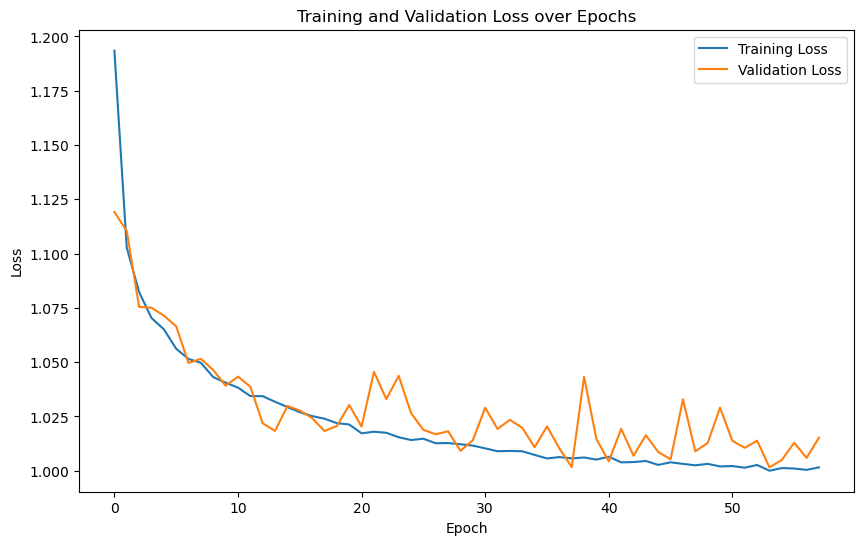

In [20]:
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot，而不是 matplotlib

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.savefig(f'../loss_curve_fig/slide_seq_human_kidney_barlow_twins_finetune_full_loss_curve_{random_seed}.png', dpi=400)  # 保存图像为png格式，400 dpi
plt.savefig(f'../loss_curve_fig/slide_seq_human_kidney_barlow_twins_finetune_full_loss_curve_{random_seed}.eps', format='eps', dpi=400)  # 保存图像为png格式，400 dpi

plt.show()


In [21]:
# 8. 使用 KNN 替代测试阶段的 FC 分类层
# 使用 encoder 提取训练集和测试集的 embedding
estim.model.eval()
with torch.no_grad():
    train_embeddings = estim.model.inner_model(torch.tensor(X_train).float().to(device)).cpu().numpy()
    test_embeddings = estim.model.inner_model(torch.tensor(X_test).float().to(device)).cpu().numpy()

In [22]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

    

    # 初始化和训练KNN分类器
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_embeddings, y_train)
    
    # 模型预测
predictions = knn.predict(test_embeddings)

    # 计算准确率和 F1 分数
accuracy = accuracy_score(y_test, predictions)
print(f"KNN Accuracy on Test Data: {accuracy}")
f1 = f1_score(y_test, predictions, average='weighted')
print(f"Weighted F1 Score: {f1}")
    
macro_f1 = f1_score(y_test, predictions, average='macro')
print(f'Macro F1 Score: {macro_f1}')

    # 计算随机猜测的准确率
class_probabilities = np.bincount(y_test) / len(y_test)
random_accuracy = np.sum(class_probabilities ** 2)
print(f"Random Guess Accuracy: {random_accuracy}")

    # 生成分类报告
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print(report)

KNN Accuracy on Test Data: 0.6376187648456056
Weighted F1 Score: 0.610687195072015
Macro F1 Score: 0.35173605849697187
Random Guess Accuracy: 0.2927884776016484
                                                           precision    recall  f1-score   support

                          blood vessel smooth muscle cell       0.36      0.21      0.27       852
                                         endothelial cell       0.66      0.84      0.74     13511
                 kidney collecting duct intercalated cell       0.35      0.23      0.28      1032
                    kidney collecting duct principal cell       0.67      0.60      0.63      2040
          kidney distal convoluted tubule epithelial cell       0.52      0.41      0.46       618
                                     kidney granular cell       0.35      0.06      0.10       105
                           kidney interstitial fibroblast       0.31      0.08      0.12       781
kidney loop of Henle thick ascending limb epit

/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hanchuangyi/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [23]:
with torch.no_grad():
    new_data_tensor = torch.tensor(new_data).float().to(device)
    SSL_embeddings = estim.model.inner_model(new_data_tensor).detach().cpu().numpy()
new_adata = sc.read_h5ad(data_dir)
new_adata.obsm[f'SSL_BT_FT_{random_seed}'] = SSL_embeddings
new_adata.uns[f'BT_FT_y_test_{random_seed}'] = y_test
new_adata.uns[f'BT_FT_predictions_{random_seed}'] = predictions
new_adata.uns[f'BT_FT_target_names_{random_seed}'] = label_encoder.classes_
new_adata.uns[f'BT_FT_train_loss_{random_seed}'] = train_losses
new_adata.uns[f'BT_FT_val_loss_{random_seed}'] = val_losses
new_adata.write_h5ad(data_dir)

In [24]:

import pandas as pd
import os
import re

# 当前 Notebook 文件名
notebook_name = "slide_seq_human_kidney_barlow_twins_fine_tune_42.ipynb"

# 初始化需要打印的值
init_train_loss = train_losses[0] if 'train_losses' in globals() else None
init_val_loss = val_losses[0] if 'val_losses' in globals() else None
converged_epoch = len(train_losses) - patience if 'train_losses' in globals() else None
converged_val_loss = best_val_loss if 'best_val_loss' in globals() else None

# 打印所有所需的指标
print("Metrics Summary:")
if 'train_losses' in globals():
    print(f"init_train_loss\tinit_val_loss\tconverged_epoch\tconverged_val_loss\tmacro_f1\tweighted_f1\tmicor_f1")
    print(f"{init_train_loss:.3f}\t{init_val_loss:.3f}\t{converged_epoch}\t{converged_val_loss:.3f}\t{macro_f1:.3f}\t{f1:.3f}\t{accuracy:.3f}")
else:
    print(f"macro_f1\tweighted_f1\tmicor_f1")
    print(f"{macro_f1:.3f}\t{f1:.3f}\t{accuracy:.3f}")

# 保存结果到 CSV 文件
output_data = {
    'dataset_split_random_seed': [int(random_seed)],
    'dataset': ['slide_seq_human_kidney'],
    'method': [re.search(r'kidney_(.*?)_\d+', notebook_name).group(1)],
    'init_train_loss': [init_train_loss if init_train_loss is not None else ''],
    'init_val_loss': [init_val_loss if init_val_loss is not None else ''],
    'converged_epoch': [converged_epoch if converged_epoch is not None else ''],
    'converged_val_loss': [converged_val_loss if converged_val_loss is not None else ''],
    'macro_f1': [macro_f1],
    'weighted_f1': [f1],
    'micor_f1': [accuracy]
}
output_df = pd.DataFrame(output_data)

# 保存到当前目录下名为 results 的文件夹中
if not os.path.exists('results'):
    os.makedirs('results')

csv_filename = f"results/{os.path.splitext(notebook_name)[0]}_results.csv"
output_df.to_csv(csv_filename, index=False)


Metrics Summary:
init_train_loss	init_val_loss	converged_epoch	converged_val_loss	macro_f1	weighted_f1	micor_f1
1.193	1.119	38	1.002	0.352	0.611	0.638
